---

### Комментарий наставника

Привет, Николай!

Спасибо за проделанную работу. Все комментарии увидишь по ходу работы.

---

### Цель исследования 

Сервис "Нупозвони" разрабатывает новый функционал, который будет выдавать руководителю информацию о наиболее неэффективных операторах. Неэффективными операторами считаются те, у которых большое число пропущенных входящих вызовов (внутренних и внешних), а также высокое время ожидания ответа при входящих вызовах.<br>

### Загрузка, первичный осмотр и предобработка данных

In [1]:
import pandas as pd

In [2]:
telecom_dataset=pd.read_csv('telecom_dataset.csv')

In [3]:
telecom_clients=pd.read_csv('telecom_clients.csv')

In [4]:
telecom_dataset.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [5]:
telecom_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [6]:
telecom_dataset.isnull().sum()

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

Всех операторов с пропущенными айди удалим.

---

### Комментарий наставника

Конечно, эти значения не имеют смысла для нас :) 

---

In [7]:
telecom_dataset.dropna(subset=['operator_id'],inplace=True)

In [8]:
telecom_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45730 entries, 1 to 53900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              45730 non-null  int64  
 1   date                 45730 non-null  object 
 2   direction            45730 non-null  object 
 3   internal             45670 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       45730 non-null  bool   
 6   calls_count          45730 non-null  int64  
 7   call_duration        45730 non-null  int64  
 8   total_call_duration  45730 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.2+ MB


In [9]:
telecom_dataset.isnull().sum()

user_id                 0
date                    0
direction               0
internal               60
operator_id             0
is_missed_call          0
calls_count             0
call_duration           0
total_call_duration     0
dtype: int64

In [10]:
telecom_dataset[telecom_dataset['internal'].isnull()]

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
1924,166406,2019-09-02 00:00:00+03:00,in,NaN,879898.0,False,1,2,9
6210,166541,2019-09-26 00:00:00+03:00,in,NaN,908960.0,False,1,393,423
6216,166541,2019-09-26 00:00:00+03:00,in,NaN,908958.0,False,2,547,612
7528,166604,2019-11-01 00:00:00+03:00,in,NaN,893402.0,False,1,94,117
8650,166658,2019-09-24 00:00:00+03:00,in,NaN,890404.0,False,1,150,157
9080,166658,2019-10-15 00:00:00+03:00,in,NaN,890404.0,False,1,51,57
16180,166916,2019-10-01 00:00:00+03:00,in,NaN,906396.0,False,1,100,117
16304,166916,2019-10-07 00:00:00+03:00,in,NaN,906406.0,False,3,378,461
16569,166916,2019-10-23 00:00:00+03:00,in,NaN,906400.0,False,1,81,110
18647,166983,2019-09-02 00:00:00+03:00,in,NaN,901880.0,False,1,119,127


Пропуски в internal заполним как False.

In [11]:
telecom_dataset['internal']=telecom_dataset['internal'].fillna(False)

Приведем значения айди операторов к целочисленному типу.

In [12]:
telecom_dataset['operator_id']=telecom_dataset['operator_id'].apply(lambda x: int(x))

In [13]:
telecom_clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [14]:
telecom_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


Столбцы с датами сконвертируем в даты.

In [15]:
telecom_dataset['date']=pd.to_datetime(telecom_dataset['date'])

In [16]:
telecom_dataset['date']=telecom_dataset['date'].dt.date

In [17]:
telecom_clients['date_start']=pd.to_datetime(telecom_clients['date_start'])

In [18]:
telecom_dataset.duplicated().sum()

4184

В датасете 4100 дубликатов - удалим их.

In [19]:
telecom_dataset.drop_duplicates(inplace=True)

In [20]:
telecom_dataset.duplicated().sum()

0

---

### Комментарий наставника

Всё здорово, но где удаление дубликатов? Тут их огромное количество. Это упущение стоит наверстать. Удали их, пожалуйста.

---

### Исследовательский анализ данных

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [22]:
telecom_dataset

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
1,166377,2019-08-05,out,True,880022,True,3,0,5
2,166377,2019-08-05,out,True,880020,True,1,0,1
3,166377,2019-08-05,out,True,880020,False,1,10,18
4,166377,2019-08-05,out,False,880022,True,3,0,25
5,166377,2019-08-05,out,False,880020,False,2,3,29
...,...,...,...,...,...,...,...,...,...
53895,168606,2019-11-09,out,False,957922,False,4,551,593
53896,168606,2019-11-10,out,True,957922,False,1,0,25
53897,168606,2019-11-10,out,True,957922,True,1,0,38
53898,168606,2019-11-11,out,True,957922,False,2,479,501


Text(0.5, 1.0, 'Соотношение входящих звонков к исходящим')

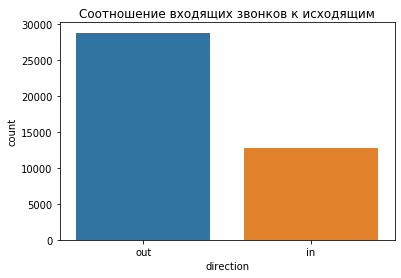

In [23]:
sns.countplot(telecom_dataset['direction'])
plt.title('Соотношение входящих звонков к исходящим')

Text(0.5, 1.0, 'Соотношение внешних звонков к внутренним')

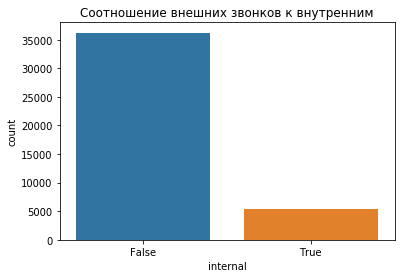

In [24]:
sns.countplot(telecom_dataset['internal'])
plt.title('Соотношение внешних звонков к внутренним')

Text(0.5, 1.0, 'Соотношение пропущенных звонков к принятым')

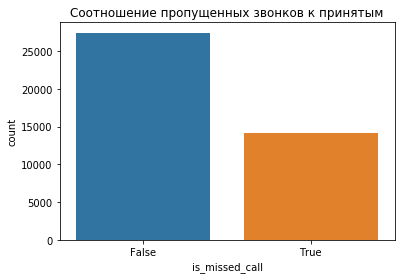

In [25]:
sns.countplot(telecom_dataset['is_missed_call'])
plt.title('Соотношение пропущенных звонков к принятым')

In [26]:
telecom_dataset['calls_count'].describe()

count    41546.000000
mean        16.900424
std         59.749373
min          1.000000
25%          1.000000
50%          4.000000
75%         13.000000
max       4817.000000
Name: calls_count, dtype: float64

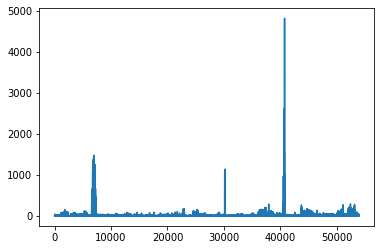

In [27]:
telecom_dataset['calls_count'].plot()


На графике заметны выбросы, избавимся от них в датафрейме.

In [28]:
outburst=telecom_dataset['calls_count'].quantile(0.99)

---

### Комментарий наставника

Допустим, но тут явно присутствуют аномалии, о которых писали в чате слака

---

In [29]:
telecom_dataset=telecom_dataset.query('calls_count<=@outburst')

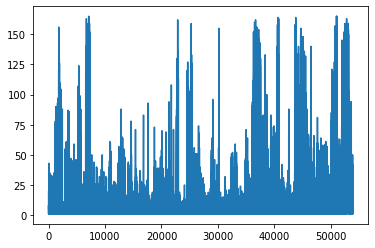

In [30]:
telecom_dataset['calls_count'].plot()


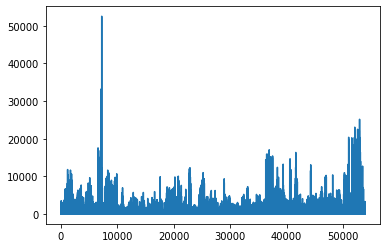

In [31]:
telecom_dataset['call_duration'].plot()

Также заметен выброс, избавимся от него

In [32]:
outburst2=telecom_dataset['call_duration'].quantile(0.99)

Установим смену равной 43200 секунд(или 12 часов) и по ним также отсечем значения.

In [33]:
outburst3=43200

---

### Комментарий наставника

Рекомендую оценить по количеству секунд в сутках, и по ним отсекать значения. Так будет надежней.

---

In [34]:
telecom_dataset=telecom_dataset.query('call_duration<=@outburst2')

In [35]:
telecom_dataset=telecom_dataset.query('call_duration<=@outburst3')

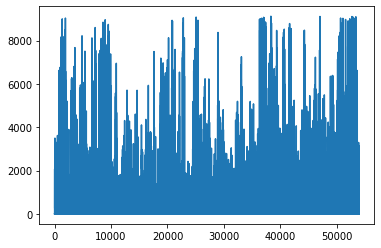

In [36]:
telecom_dataset['call_duration'].plot()

In [37]:
telecom_dataset['total_call_duration'].describe()

count    40719.000000
mean       891.853115
std       1497.851847
min          0.000000
25%         65.000000
50%        274.000000
75%       1014.000000
max      12195.000000
Name: total_call_duration, dtype: float64

In [38]:
telecom_dataset=telecom_dataset.query('total_call_duration<=@outburst3')

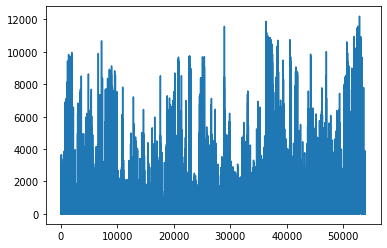

In [39]:
telecom_dataset['total_call_duration'].plot()

Создадим датафрейм, сгрупированный по дате и оператору, чтобы посмотреть не выходят ли за рамки возможных теоретически значений(смена=12 часов) данные.

In [40]:
telecom_dataset.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
1,166377,2019-08-05,out,True,880022,True,3,0,5
2,166377,2019-08-05,out,True,880020,True,1,0,1
3,166377,2019-08-05,out,True,880020,False,1,10,18
4,166377,2019-08-05,out,False,880022,True,3,0,25
5,166377,2019-08-05,out,False,880020,False,2,3,29


In [41]:
grouped_by_day=telecom_dataset.groupby(['date','user_id','operator_id','direction']).agg({'calls_count':'sum','call_duration':'sum','total_call_duration':'sum','is_missed_call':'sum'}).reset_index()

In [42]:
grouped_by_day.head()

,date,user_id,operator_id,direction,calls_count,call_duration,total_call_duration,is_missed_call
0,2019-08-02,166406,879896,out,13,31,285,1.0
1,2019-08-02,166406,879898,out,5,132,198,1.0
2,2019-08-02,166406,880240,out,1,0,4,1.0
3,2019-08-03,166406,879896,in,1,6,15,0.0
4,2019-08-03,166406,879896,out,10,48,302,1.0


In [43]:
grouped_by_day.describe()

,user_id,operator_id,calls_count,call_duration,total_call_duration,is_missed_call
count,26688.000000,26688.000000,26688.000000,26688.000000,26688.000000,26688.000000
mean,167291.052683,916270.733288,17.959270,1042.335769,1360.737672,0.521470
std,592.148841,20852.261046,31.730441,1515.726291,1972.072423,0.594554
min,166377.000000,879896.000000,1.000000,0.000000,0.000000,0.000000
25%,166800.000000,900746.000000,2.000000,92.000000,141.000000,0.000000
50%,167175.000000,913788.000000,5.000000,421.000000,555.000000,0.000000
75%,167799.000000,936382.000000,18.000000,1327.250000,1714.000000,1.000000
max,168606.000000,973286.000000,310.000000,9180.000000,15504.000000,2.000000


Максимальные значения call_duration,total_call_duration - не превышают 43200 секунд или 12 часов, а значит мы можем считать данные достоверными.

### Определение неэффективных операторов

In [44]:
import numpy as np

In [45]:
telecom_dataset.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
1,166377,2019-08-05,out,True,880022,True,3,0,5
2,166377,2019-08-05,out,True,880020,True,1,0,1
3,166377,2019-08-05,out,True,880020,False,1,10,18
4,166377,2019-08-05,out,False,880022,True,3,0,25
5,166377,2019-08-05,out,False,880020,False,2,3,29


In [46]:
grouped_by_day['waiting']=grouped_by_day['total_call_duration']-grouped_by_day['call_duration']

In [47]:
grouped_by_day.groupby(['date','operator_id'])['is_missed_call'].sum().describe()

count    19584.000000
mean         0.710631
std          0.624818
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: is_missed_call, dtype: float64

Мы видим, что кол-во пропущенных вызовов в день на оператора не велико и достигает максимум 4 звонков.

In [48]:
grouped_by_day.groupby(['date','user_id'])[['calls_count',
       'call_duration', 'total_call_duration', 'is_missed_call', 'waiting']].mean()

calls_count  call_duration  total_call_duration  \
date       user_id                                                    
2019-08-02 166406      6.333333      54.333333           162.333333   
2019-08-03 166406      9.000000     320.666667           474.666667   
2019-08-04 166406      2.000000      57.000000            74.500000   
2019-08-05 166377      9.000000       6.500000            64.000000   
           166406     41.250000    1883.750000          2341.000000   
...                         ...            ...                  ...   
2019-11-28 168522      2.000000     211.000000           247.000000   
           168579      2.000000      17.000000           105.000000   
           168583      2.000000      82.000000           110.000000   
           168598      7.000000    1316.000000          1359.000000   
           168601      2.000000       0.000000            67.000000   

                    is_missed_call  waiting  
date       user_id                           
2019-08-02 166406         1.000000   108.00  
2019-08-03 166406         0.666667   154.00  
2019-08-04 166406         1.000000    17.50  
2019-08-05 166377         2.000000    57.50  
           166406         0.500000   457.25  
...                            ...      ...  
2019-11-28 168522         0.000000    36.00  
           168579         0.000000    88.00  
           168583         0.000000    28.00  
           168598         0.000000    43.00  
           168601         1.000000    67.00  

[8577 rows x 5 columns]

Для некоторых клиентов характерно большое кол-во звонков, тогда как для других - небольшое.

---

### Комментарий наставника

Здорово! Соглашусь с этим, но также стоит учитывать клиентские особенности.

То есть, оператор может работать на какого-то клиента, а этот клиент обрабатывает 10 звонков за сутки. Согласись, это мало, но это не вина оператора, он мог все эти вызовы успешно принять.

С другой стороны, оператор у крупного клиента обработает 100 вызовов, но пропустит 200. Тут уже совсем о других масштабах речь, верно же?

Поэтому учти ещё и то, сколько клиент в день имел звонков.

---

In [49]:
grouped_by_operator=telecom_dataset.groupby(['operator_id','direction']).agg({'calls_count':'sum','call_duration':'sum','total_call_duration':'sum','is_missed_call':'sum'}).reset_index()

In [50]:
grouped_by_operator['percentage_of_waiting']=(grouped_by_operator['total_call_duration']-grouped_by_operator['call_duration'])/grouped_by_operator['total_call_duration']

In [51]:
grouped_by_operator

,operator_id,direction,calls_count,call_duration,total_call_duration,is_missed_call,percentage_of_waiting
0,879896,in,58,5616,6190,0.0,0.092730
1,879896,out,742,47630,58233,47.0,0.182079
2,879898,in,104,6353,8033,0.0,0.209137
3,879898,out,7209,251038,353255,89.0,0.289358
4,880020,in,7,299,353,0.0,0.152975
...,...,...,...,...,...,...,...
1631,972412,out,60,3378,4403,2.0,0.232796
1632,972460,in,1,14,18,0.0,0.222222
1633,972460,out,50,1204,1820,3.0,0.338462
1634,973120,out,3,5,25,1.0,0.800000


In [52]:
missed=grouped_by_day.groupby(['user_id','operator_id']).agg({'is_missed_call':'sum','calls_count':'sum'}).reset_index()

In [53]:
missed['percentage']=missed['is_missed_call']/missed['calls_count']

In [54]:
missed['percentage'].describe()

count    1092.000000
mean        0.101509
std         0.168654
min         0.000000
25%         0.010118
50%         0.043720
75%         0.121029
max         1.000000
Name: percentage, dtype: float64

In [55]:
grouped_by_day

,date,user_id,operator_id,direction,calls_count,call_duration,total_call_duration,is_missed_call,waiting
0,2019-08-02,166406,879896,out,13,31,285,1.0,254
1,2019-08-02,166406,879898,out,5,132,198,1.0,66
2,2019-08-02,166406,880240,out,1,0,4,1.0,4
3,2019-08-03,166406,879896,in,1,6,15,0.0,9
4,2019-08-03,166406,879896,out,10,48,302,1.0,254
...,...,...,...,...,...,...,...,...,...
26683,2019-11-28,168522,951614,in,2,211,247,0.0,36
26684,2019-11-28,168579,973286,in,2,17,105,0.0,88
26685,2019-11-28,168583,962062,in,2,82,110,0.0,28
26686,2019-11-28,168598,958394,in,7,1316,1359,0.0,43


In [56]:
grouped_by_user=grouped_by_day.groupby(['user_id','date']).agg({'operator_id':'max','calls_count':'sum','call_duration':'sum','total_call_duration':'sum','is_missed_call':'sum','waiting':'sum'}).reset_index()

In [57]:
pivot_userids=grouped_by_user.pivot_table(index=['user_id'],values=['calls_count', 'call_duration',
       'total_call_duration', 'is_missed_call', 'waiting'],aggfunc='mean')

In [58]:
pivot_userids.describe()

,call_duration,calls_count,is_missed_call,total_call_duration,waiting
count,290.000000,290.000000,290.000000,290.000000,290.000000
mean,2362.130309,46.376650,1.301273,3201.425720,839.295411
std,6529.384613,174.688413,2.543196,9957.392575,3604.826283
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,158.125000,2.291209,0.104412,192.812500,32.667500
50%,523.896878,7.500000,0.694639,631.522727,106.989394
75%,1967.663462,33.554167,1.252216,2395.720192,520.937628
max,77986.407407,2243.629630,20.962963,126007.888889,48021.481481


Разобьем клиентов на три группы по call_duration 	calls_count 	is_missed_call 	total_call_duration 	waiting


In [59]:
groupA=pivot_userids.query('call_duration<=158.125000 and calls_count<=2.291209 and is_missed_call<=0.104412 and total_call_duration<=192.812500 and waiting<=32.667500')

In [60]:
groupB=pivot_userids.query('158.125000<call_duration<=523.896878 and 2.291209<calls_count<=7.500000 and 0.104412<is_missed_call<=0.694639 and 192.812500<total_call_duration<=631.522727 and 32.667500<waiting<=106.989394')

In [61]:
groupC=pivot_userids.query('call_duration>523.896878 and calls_count>7.500000 and is_missed_call>0.694639 and total_call_duration>631.522727 and waiting>106.989394')

Возьмем 99-перцентили ожидания и по ним выделим неэффективных операторов.

In [62]:
grouped_by_day.query('user_id in @groupA.index').quantile(0.99)

user_id                168583.00
operator_id            962062.00
calls_count                 3.19
call_duration             496.82
total_call_duration       514.62
is_missed_call              0.00
waiting                    61.14
Name: 0.99, dtype: float64

In [63]:
grouped_by_day.query('user_id in @groupB.index').quantile(0.99)

user_id                168221.00
operator_id            965328.00
calls_count                15.63
call_duration            1707.58
total_call_duration      1872.41
is_missed_call              1.00
waiting                   256.12
Name: 0.99, dtype: float64

In [64]:
grouped_by_day.query('user_id in @groupC.index').quantile(0.99)

user_id                168361.0
operator_id            960950.0
calls_count               170.0
call_duration            7644.0
total_call_duration      9943.3
is_missed_call              2.0
waiting                  3687.6
Name: 0.99, dtype: float64

In [65]:
groupA_non_eff=grouped_by_day.query('user_id in @groupA.index and direction=="in" and waiting>61.14')['operator_id'].to_frame()

In [66]:
groupB_non_eff=grouped_by_day.query('user_id in @groupB.index  and direction=="in"  and waiting>256.12')['operator_id'].to_frame()

In [67]:
groupC_non_eff=grouped_by_day.query('user_id in @groupC.index and direction=="in"  and waiting>3687.6')['operator_id'].to_frame()

In [68]:
total=groupA_non_eff.append(groupB_non_eff).drop_duplicates().reset_index(drop=True)
total=total.append(groupC_non_eff).drop_duplicates().reset_index(drop=True)

In [69]:
total

,operator_id
0,886674
1,923944
2,902910


---

### Комментарий наставника

Опять же, тут лучше работать с долями (ссылаюсь на клиентские особенности)

---

Неэффективными будем считать долю ожидания для входящих равной 99-перцентилю и для всех вызовов долю пропущенных вызовов равной 0.9.

In [70]:
missed_call_index=missed.query('percentage>0.9')['operator_id'].to_frame()

In [71]:
#waiting_index=grouped_by_operator.query('direction=="in" and percentage_of_waiting>0.75')['operator_id'].to_frame()

In [72]:
#total_index=waiting_index.append(missed_call_index).drop_duplicates().reset_index(drop=True)

In [73]:
total_index=missed_call_index.append(total).drop_duplicates().reset_index(drop=True)

In [74]:
total_index_list=total_index['operator_id'].tolist()

В total_index храним id всех операторов, которых сочли неэффективными.

In [75]:
len(total_index_list)

24

### Проверка статистических гипотез

In [76]:
from scipy import stats as st

Проверим гипотезу о том, что разница в ожидании между неэффективными операторами и остальными статистически значима.<br>Сформулируем нулевую и альтернативную гипотезы:<br>
H0: ожидание не различается<br>
H1: ожидание различается

In [77]:
not_eff_waiting=grouped_by_day[grouped_by_day['operator_id'].isin(total_index_list)]['waiting']

In [78]:
eff_waiting=grouped_by_day[~grouped_by_day['operator_id'].isin(total_index_list)]['waiting']

In [79]:
alpha = .05
results = st.ttest_ind(not_eff_waiting,eff_waiting,equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


In [80]:
not_eff_waiting.mean()

21.555555555555557

In [81]:
eff_waiting.mean()

319.30559627165786

У эффективных операторов ожидание больше, возможно это связано с тем, что они делают больше звонков.

Проверим гипотезу о том, что разница в количестве пропущенных звонков между неэффективными операторами и остальными статистически значима.<br>Сформулируем нулевую и альтернативную гипотезы:<br>
H0: количество не различается<br>
H1: количество различается

In [82]:
not_eff_missed=grouped_by_day[grouped_by_day['operator_id'].isin(total_index_list)]['is_missed_call']
eff_missed=grouped_by_day[~grouped_by_day['operator_id'].isin(total_index_list)]['is_missed_call']
alpha = .05
results = st.ttest_ind(not_eff_missed,eff_missed,equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0004742429699066278
Отвергаем нулевую гипотезу


In [83]:
not_eff_missed.mean()

0.32098765432098764

In [84]:
eff_missed.mean()

0.5220806554666065

У эффективных операторов процент пропущенных звонков выше, возможно это связано с тем, что они делают больше звонков.

Проверим гипотезу о том, что разница в количестве звонков между неэффективными операторами и остальными статистически значима.<br>Сформулируем нулевую и альтернативную гипотезы:<br>
H0: количестве не различается<br>
H1: количество различается

In [85]:
not_eff_count=grouped_by_day[grouped_by_day['operator_id'].isin(total_index_list)]['calls_count']
eff_count=grouped_by_day[~grouped_by_day['operator_id'].isin(total_index_list)]['calls_count']
alpha = .05
results = st.ttest_ind(not_eff_count,eff_count,equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


In [86]:
not_eff_count.mean()

1.2962962962962963

In [87]:
eff_count.mean()

18.009997369113393

У эффективных операторов больше кол-во звонков.

### Итоговый вывод

Мы провели анализ сервиса "Ну позвони" с целью выявления неэффективных операторов.<br>
Обработали пропуски и провели исследовательский анализ данных.<br>Удалили выбросы из датасета.<br>Описали алгоритм удаления неэффективных операторов и выделили список таковых.<br>Также были проверены статистические гипотезы.

### Презентация

https://yadi.sk/i/NZ2ReoC2H8hHQg

### Ссылки

https://pandas.pydata.org/
<br>https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
<br>https://seaborn.pydata.org/

---

### Комментарий наставника

Поздравляю с проделанной работой.

Мне понравились твои идеи и решения, но здесь нехватило учёта клиентских особенностей, на которые я обратил внимание во время созвона.
Также, учитывая метрики клиентов, оперируй долями. Так твои решения будет более независимы от изменения обстановки в бизнесе.

Не забудь удалить дубликаты с самого начала. 

Доработай, пожалуйста, решение. Учитывая текущее исследование, тебе надо сделать совсем чуть-чуть. Успеха! :)

---